In [ ]:
# Ch09-5 - Proteomics Analysis

In [1]:
# Install libraries
! pip install biopython matplotlib pandas seaborn pyteomics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 239.0/239.0 kB 8.9 MB/s eta 0:00:00


Protein Molecular Weight: 15414.99 Da
Protein Hydrophobicity (GRAVY): -0.61
Protein Isoelectric Point (pI): 4.39

Top 10 Peptides:
                                     Peptide    Mass (Da)
2                               LGFLHSGTGFVK  1261.681907
3  LLPENNVLSPLPSQAMDDLMLSPDDIEQWFTEDPGPDEAPR  4591.141076
4                                       LMFK   537.298491
5                   MEEPQSDPSVEPPLSQETFSDLWK  2775.258542
6       MPEAAPPVAPAPAAPTPAAPAPAPSWPLSSSVPSQK  3442.759512
7                                    TEGPDSD   719.260978
8                                  TYQGSYGFR  1077.487959
9                                    VGQSTSR   733.371866


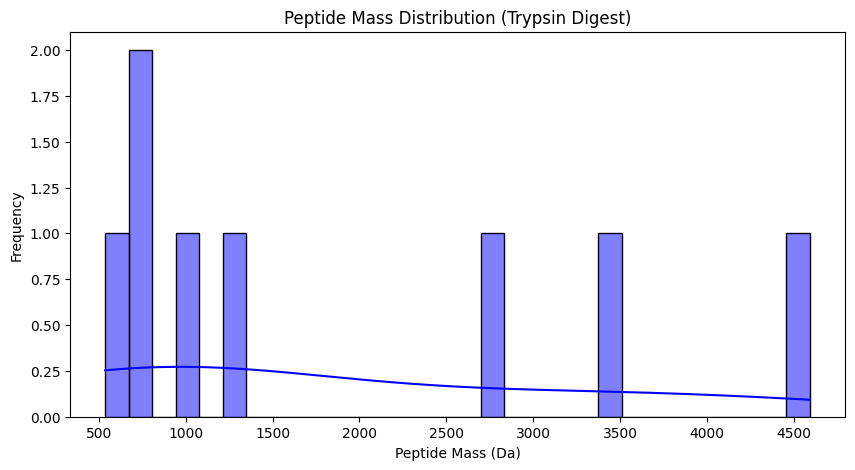

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from Bio.SeqUtils.ProtParam import ProteinAnalysis
from pyteomics import parser, mass

# Define a sample protein sequence (P53 - TP53 Tumor Suppressor)
protein_sequence = (
    "MEEPQSDPSVEPPLSQETFSDLWKLLPENNVLSPLPSQAMDDLMLSPDDIEQWFTEDPG"
    "PDEAPRMPEAAPPVAPAPAAPTPAAPAPAPSWPLSSSVPSQKTYQGSYGFRLGFLHSGT"
    "GFVKVGQSTSRHKKLMFKTEGPDSD"
)

# Analyze protein properties
protein = ProteinAnalysis(protein_sequence)
molecular_weight = protein.molecular_weight()
hydrophobicity = protein.gravy()
isoelectric_point = protein.isoelectric_point()
amino_acid_composition = protein.count_amino_acids()

print(f"Protein Molecular Weight: {molecular_weight:.2f} Da")
print(f"Protein Hydrophobicity (GRAVY): {hydrophobicity:.2f}")
print(f"Protein Isoelectric Point (pI): {isoelectric_point:.2f}")

# Perform in-silico trypsin digestion
peptides = sorted(list(parser.cleave(protein_sequence, parser.expasy_rules['trypsin'])))  # Convert set to list

# Calculate peptide masses
peptide_masses = [mass.calculate_mass(sequence=p) for p in peptides]

# Create DataFrame for peptide properties
df = pd.DataFrame({'Peptide': peptides, 'Mass (Da)': peptide_masses})

# Filter out very small peptides (e.g., <500 Da)
df = df[df['Mass (Da)'] > 500]

# Display top 10 peptides
print("\nTop 10 Peptides:")
print(df.head(10))

# Visualization: Peptide mass distribution
plt.figure(figsize=(10, 5))
sns.histplot(df['Mass (Da)'], bins=30, kde=True, color="blue")
plt.xlabel("Peptide Mass (Da)")
plt.ylabel("Frequency")
plt.title("Peptide Mass Distribution (Trypsin Digest)")
plt.show()
